<a href="https://colab.research.google.com/github/Starleen1996/Challenger_1_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación


1- Crear dos listas, una que contiene las cuatro tiendas y otra que contiene la
suma de los ingresos de cada tienda en la columna "Precio"

2- Crear un bucle for creando una para cada tienda en la cual se almacena los valores de los ingresos resultados de las ventas y una variable con la suma de ingresos de cada tienda

3- Imprimir los valores de la suma de los ingresos de cada tienda a partir de la lista creada en el paso 1

In [6]:
# En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

tiendas = [tienda,tienda2,tienda3,tienda4]  # Lista de las tiendas
sumas_precios = [] #Lista para almacenar las sumas de cada tienda


for tienda in tiendas:
    precios = tienda["Precio"].tolist()
    suma = sum(precios)
    sumas_precios.append(suma)

print(f'Ingreso total: Tienda${sumas_precios[0]:,}, Tienda2 ${sumas_precios[1]:,}, Tienda3 ${sumas_precios[2]:,}, Tienda4 ${sumas_precios[3]:,}')


Ingreso total: Tienda$1,150,880,400.0, Tienda2 $1,116,343,500.0, Tienda3 $1,098,019,600.0, Tienda4 $1,038,375,700.0


#GRAFICAMOS EL RESULTADO DE LA FACTURACIÓN

## 1: Define los valores correctamente

In [7]:
import matplotlib.pyplot as plt

# Nombres de las tiendas (puedes ajustarlos si lo prefieres)
nombres_tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

# Ingresos como números (sin comas, sin símbolo $)
sumas_precios = [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

## 2 Graficamos la facturación correspondiente a la columna precio por tienda

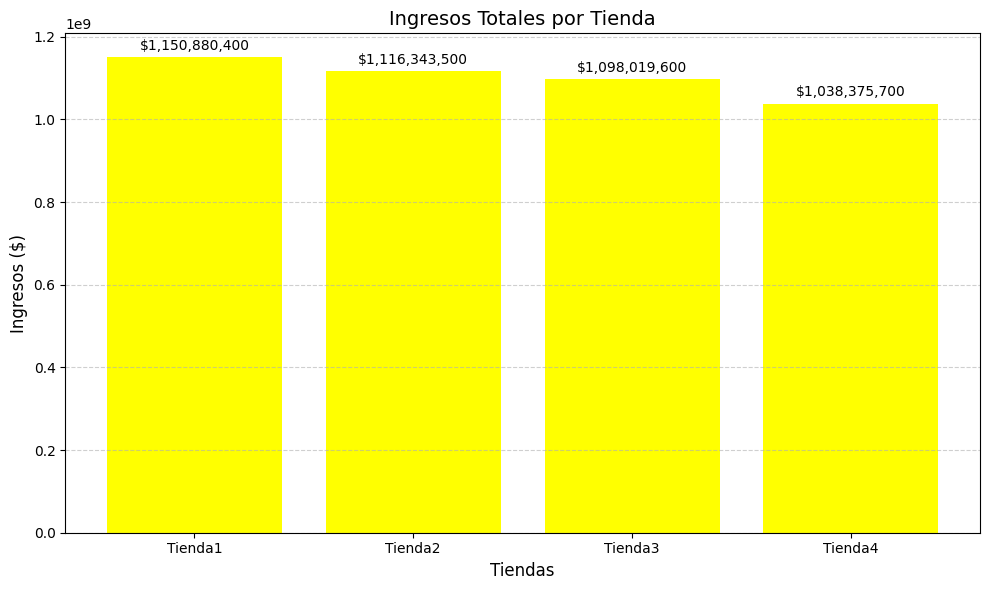

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(nombres_tiendas, sumas_precios, color='yellow')

# Añadir títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar los valores sobre cada barra
for i, valor in enumerate(sumas_precios):
    plt.text(i, valor + 1e7, f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [9]:
#En este debes calcular la cantidad de productos vendidos por categoría en cada tienda.
#La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

def calcular_datos_producto(tienda):
    """
    Calcula el total de elementos y el precio total por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos y el precio total.
    """
    # Agrupa los datos por 'Categoria del Producto' y calcula el tamaño de cada grupo y la suma del precio.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        precio_total=('Precio', 'sum')
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['precio_total'])

    return diccionario_resultado

# Calcula los datos para cada tienda
tienda1_datos = calcular_datos_producto(tienda)
tienda2_datos = calcular_datos_producto(tienda2)
tienda3_datos = calcular_datos_producto(tienda3)
tienda4_datos = calcular_datos_producto(tienda4)

# Imprime los resultados de forma legible
print("Datos de la Tienda 1:")
for categoria, (total_elementos, precio_total) in tienda1_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 2:")
for categoria, (total_elementos, precio_total) in tienda2_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 3:")
for categoria, (total_elementos, precio_total) in tienda3_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 4:")
for categoria, (total_elementos, precio_total) in tienda4_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

Datos de la Tienda 1:
  Categoría: Artículos para el hogar, Total de Elementos: 201, Precio Total: $15,074,500
  Categoría: Deportes y diversión, Total de Elementos: 277, Precio Total: $33,350,100
  Categoría: Electrodomésticos, Total de Elementos: 254, Precio Total: $283,260,200
  Categoría: Electrónicos, Total de Elementos: 451, Precio Total: $409,476,100
  Categoría: Instrumentos musicales, Total de Elementos: 170, Precio Total: $75,102,400
  Categoría: Juguetes, Total de Elementos: 338, Precio Total: $20,262,200
  Categoría: Libros, Total de Elementos: 187, Precio Total: $9,321,300
  Categoría: Muebles, Total de Elementos: 480, Precio Total: $192,528,900

Datos de la Tienda 2:
  Categoría: Artículos para el hogar, Total de Elementos: 181, Precio Total: $14,746,900
  Categoría: Deportes y diversión, Total de Elementos: 275, Precio Total: $34,744,500
  Categoría: Electrodomésticos, Total de Elementos: 305, Precio Total: $348,567,800
  Categoría: Electrónicos, Total de Elementos: 422,

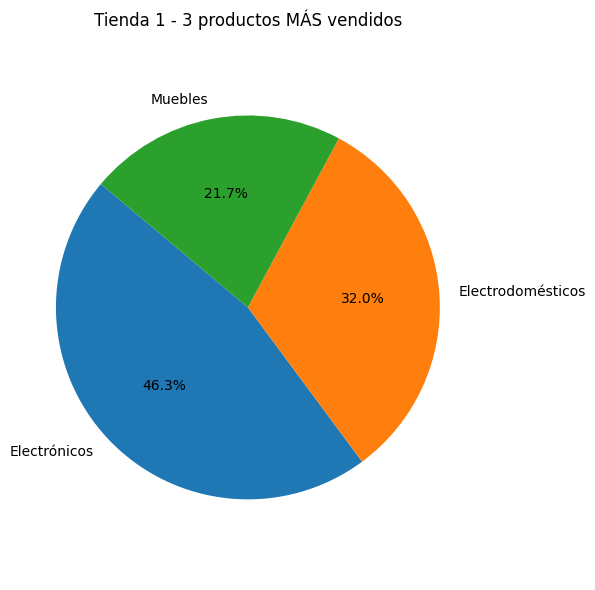

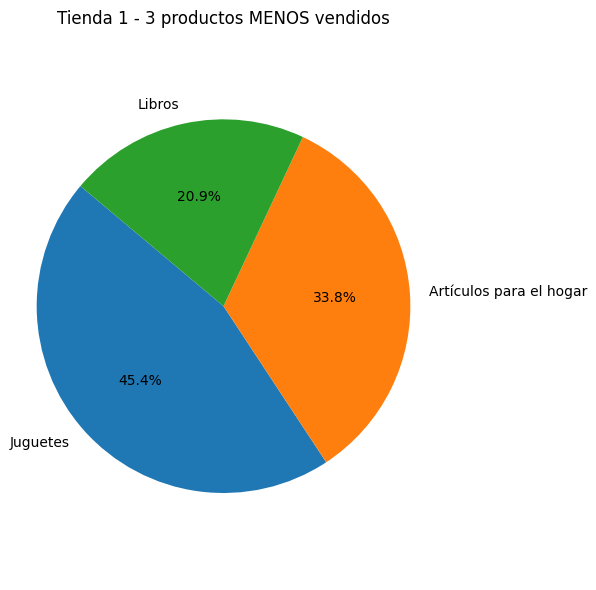

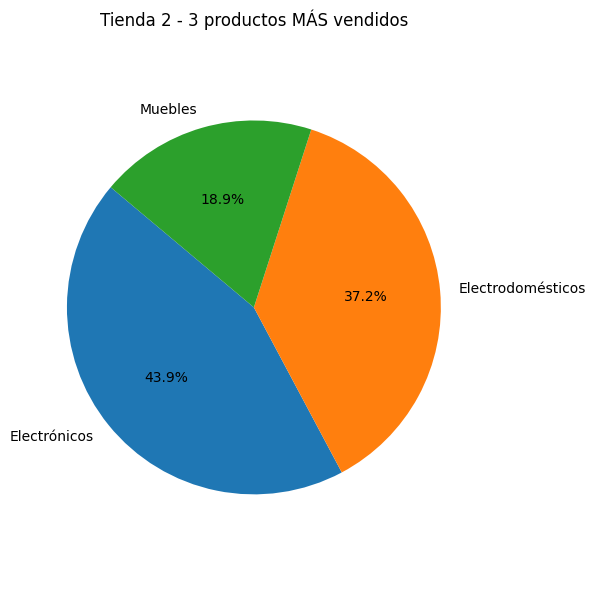

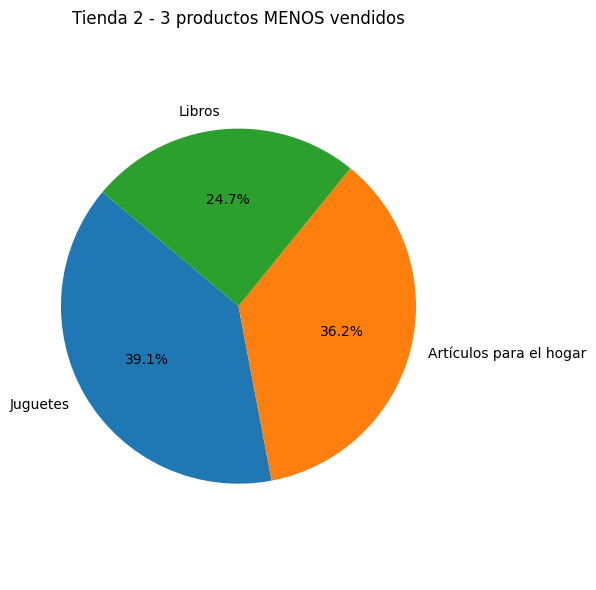

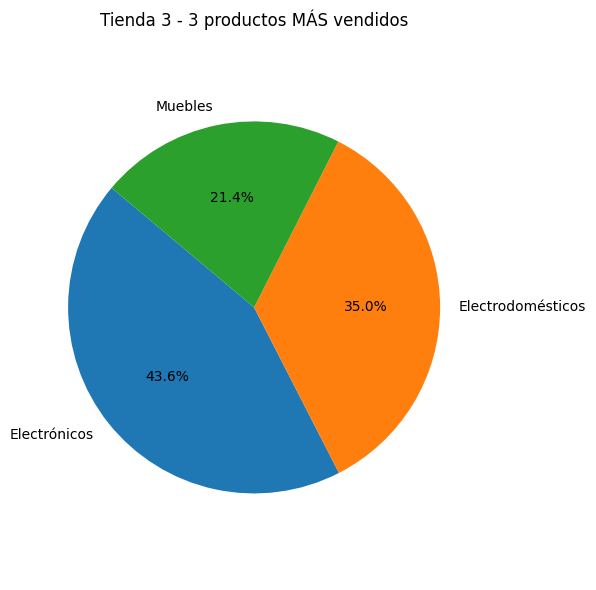

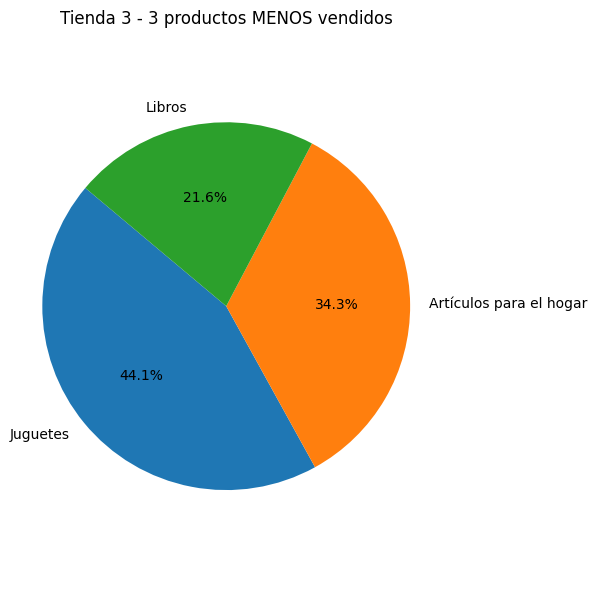

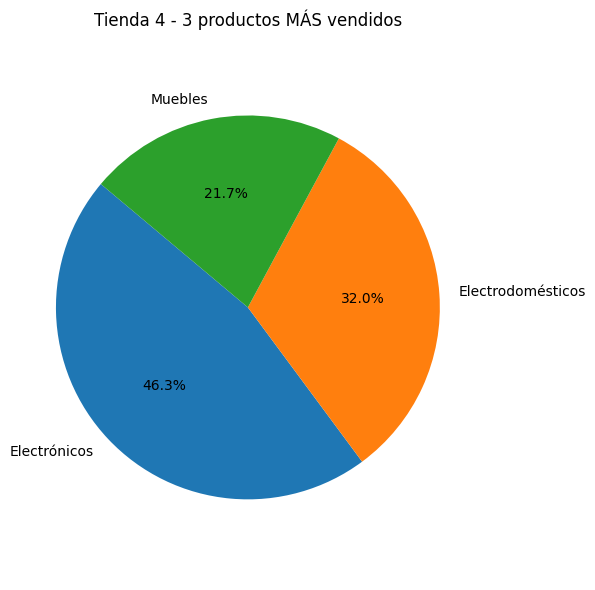

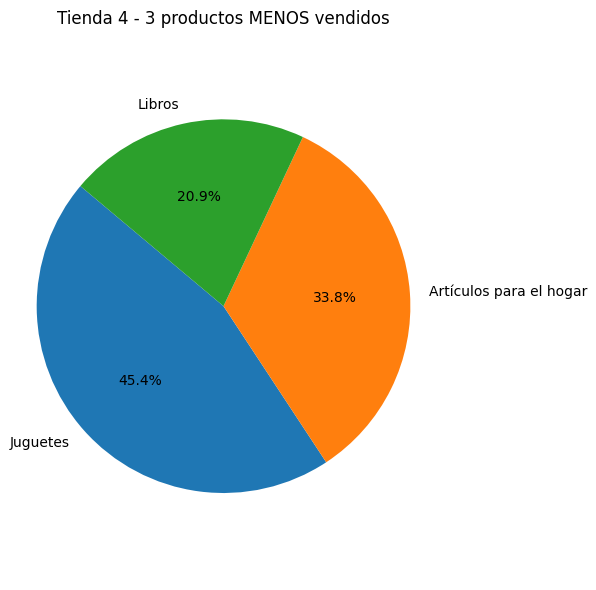

In [28]:
# Grafico que muestra las ventas de los productos mas vendidos y menos vendidos en cada una de las 4 tiendas
import matplotlib.pyplot as plt

# Datos por tienda (en millones para simplificar el gráfico)
tiendas = {
    "Tienda 1": {
        "Artículos para el hogar": 15074500,
        "Deportes y diversión": 33350100,
        "Electrodomésticos": 283260200,
        "Electrónicos": 409476100,
        "Instrumentos musicales": 75102400,
        "Juguetes": 20262200,
        "Libros": 9321300,
        "Muebles": 192528900
    },
    "Tienda 2": {
        "Artículos para el hogar": 14746900,
        "Deportes y diversión": 34744500,
        "Electrodomésticos": 348567800,
        "Electrónicos": 410831100,
        "Instrumentos musicales": 104990300,
        "Juguetes": 15945400,
        "Libros": 10091200,
        "Muebles": 176426300
    },
    "Tienda 3": {
        "Artículos para el hogar": 15060000,
        "Deportes y diversión": 35593100,
        "Electrodomésticos": 329237900,
        "Electrónicos": 410775800,
        "Instrumentos musicales": 77380900,
        "Juguetes": 19401100,
        "Libros": 9498700,
        "Muebles": 201072100
    },
    "Tienda 4": {
        "Artículos para el hogar": 15074500,
        "Deportes y diversión": 33350100,
        "Electrodomésticos": 283260200,
        "Electrónicos": 409476100,
        "Instrumentos musicales": 75102400,
        "Juguetes": 20262200,
        "Libros": 9321300,
        "Muebles": 192528900
    }
}


def graficar_pie(datos, titulo):
    labels = list(datos.keys())
    valores = list(datos.values())

    plt.figure(figsize=(6, 6))
    plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

for nombre_tienda, categorias in tiendas.items():
    # Ordenar categorías por ventas
    categorias_ordenadas = dict(sorted(categorias.items(), key=lambda item: item[1], reverse=True))

    # Top 3 más vendidos
    top_3 = dict(list(categorias_ordenadas.items())[:3])
    graficar_pie(top_3, f"{nombre_tienda} - 3 productos MÁS vendidos")

    # Bottom 3 menos vendidos
    bottom_3 = dict(list(categorias_ordenadas.items())[-3:])
    graficar_pie(bottom_3, f"{nombre_tienda} - 3 productos MENOS vendidos")

# 3. Calificación promedio de la tienda


## En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [10]:
# Con este código se obtiene la satisfacción del cliente por producto vendido en cada tienda

In [11]:
def calcular_calificacion_producto(tienda):
    """
    Calcula el total de elementos, la suma de calificaciones y la calificación media por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos, la suma de calificaciones y la calificación media.
              Ejemplo: {'Categoría A': (120, 450.5, 3.75), 'Categoría B': (85, 320.0, 3.76)}
    """
    # Agrupa los datos por 'Categoría del Producto' y calcula el tamaño de cada grupo, la suma de las calificaciones y la media de las calificaciones.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        suma_calificaciones=('Calificación', 'sum'),
        calificacion_media=('Calificación', 'mean')  # Agregamos el cálculo de la calificación media
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas (total_elementos, suma_calificaciones, calificacion_media)
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['suma_calificaciones'], value['calificacion_media'])

    return diccionario_resultado



# Calcula y muestra el resultado para cada tienda
resultados = {
    "Tienda ": calcular_calificacion_producto(tienda),
    "Tienda 2": calcular_calificacion_producto(tienda2),
    "Tienda 3": calcular_calificacion_producto(tienda3),
    "Tienda 4": calcular_calificacion_producto(tienda4)
}

# Imprime los resultados
for nombre_tienda, resultado in resultados.items():
    print(f"\n{nombre_tienda}:")
    for categoria, (total_elementos, suma_calificaciones, calificacion_media) in resultado.items():
        print(f"  {categoria}: Total de elementos = {total_elementos}, Suma de calificaciones = {suma_calificaciones:.2f}, Calificación media = {calificacion_media:.2f}")



Tienda :
  Artículos para el hogar: Total de elementos = 201, Suma de calificaciones = 806.00, Calificación media = 4.01
  Deportes y diversión: Total de elementos = 277, Suma de calificaciones = 1123.00, Calificación media = 4.05
  Electrodomésticos: Total de elementos = 254, Suma de calificaciones = 998.00, Calificación media = 3.93
  Electrónicos: Total de elementos = 451, Suma de calificaciones = 1807.00, Calificación media = 4.01
  Instrumentos musicales: Total de elementos = 170, Suma de calificaciones = 665.00, Calificación media = 3.91
  Juguetes: Total de elementos = 338, Suma de calificaciones = 1348.00, Calificación media = 3.99
  Libros: Total de elementos = 187, Suma de calificaciones = 756.00, Calificación media = 4.04
  Muebles: Total de elementos = 480, Suma de calificaciones = 1919.00, Calificación media = 4.00

Tienda 2:
  Artículos para el hogar: Total de elementos = 181, Suma de calificaciones = 737.00, Calificación media = 4.07
  Deportes y diversión: Total de ele

## Graficamos los resultados de los promedio de calificaciones de cada tienda

In [12]:
import matplotlib.pyplot as plt

# Diccionario donde se guardarán los promedios de calificación por tienda
promedios_por_tienda = {}

# Recorremos los resultados y calculamos el promedio de calificaciones por tienda
for nombre_tienda, resultado in resultados.items():
    # Extrae solo las calificaciones medias
    calificaciones = [datos[2] for datos in resultado.values()]
    # Calcula el promedio general de la tienda
    promedio = sum(calificaciones) / len(calificaciones) if calificaciones else 0
    promedios_por_tienda[nombre_tienda] = promedio

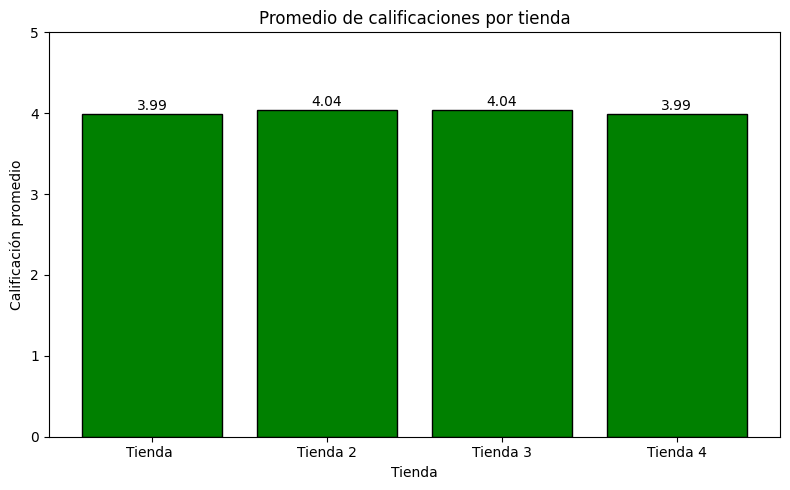

In [13]:
# Extraer nombres de tiendas y promedios
nombres_tiendas = list(promedios_por_tienda.keys())
valores_promedios = list(promedios_por_tienda.values())

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, valores_promedios, color='green', edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Promedio de calificaciones por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)  # Asumimos escala de calificación de 0 a 5

# Mostrar el valor encima de cada barra
for i, valor in enumerate(valores_promedios):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

## En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [14]:
# Paso 1: Contar cuántas veces se vendió cada producto por tienda

def analizar_ventas_por_tienda(tienda):
    """
    Analiza las ventas por producto para una tienda, identificando los productos más y menos vendidos.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        tuple: Una tupla que contiene dos diccionarios:
            - Un diccionario con los 3 productos más vendidos y su cantidad de ventas.
            - Un diccionario con los 3 productos menos vendidos y su cantidad de ventas.
    """
    # Agrupa los datos por 'Producto' y cuenta el número de ventas.
    ventas_por_producto = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)

    # Obtiene los nombres de los 3 productos con más ventas y su cantidad.
    productos_mas_vendidos = ventas_por_producto.head(3).to_dict()
    # Obtiene los nombres de los 3 productos con menos ventas y su cantidad.
    productos_menos_vendidos = ventas_por_producto.tail(3).to_dict()

    return productos_mas_vendidos, productos_menos_vendidos


# Analiza las ventas de cada tienda y muestra los resultados de los productos más y menos vendidos
print("Análisis de Ventas por Tienda:")
resultados_por_tienda = {}  # Diccionario para almacenar los resultados de cada tienda
for i, tienda in enumerate([tienda, tienda2, tienda3, tienda4]):
    nombre_tienda = f"Tienda {i+1}"
    productos_mas_vendidos, productos_menos_vendidos = analizar_ventas_por_tienda(tienda)
    resultados_por_tienda[nombre_tienda] = {
        "mas_vendidos": productos_mas_vendidos,
        "menos_vendidos": productos_menos_vendidos
    }
    print(f"\n{nombre_tienda}:")
    print(f"  Productos más vendidos: {', '.join(f'{producto} ({cantidad})' for producto, cantidad in productos_mas_vendidos.items())}")
    print(f"  Productos menos vendidos: {', '.join(f'{producto} ({cantidad})' for producto, cantidad in productos_menos_vendidos.items())}")

# Imprime el diccionario con los resultados de cada tienda
print("\nResultados por Tienda (diccionario):")
print(resultados_por_tienda)


Análisis de Ventas por Tienda:

Tienda 1:
  Productos más vendidos: Cama box (62), Cubertería (59), Cama king (56)
  Productos menos vendidos: Guitarra acústica (37), Armario (34), Guitarra eléctrica (33)

Tienda 2:
  Productos más vendidos: Iniciando en programación (65), Microondas (62), Batería (61)
  Productos menos vendidos: Impresora (34), Mesa de comedor (34), Juego de mesa (32)

Tienda 3:
  Productos más vendidos: Kit de bancas (57), Mesa de comedor (56), Cama king (56)
  Productos menos vendidos: Microondas (36), Set de vasos (36), Bloques de construcción (35)

Tienda 4:
  Productos más vendidos: Cama box (62), Cubertería (59), Cama king (56)
  Productos menos vendidos: Guitarra acústica (37), Armario (34), Guitarra eléctrica (33)

Resultados por Tienda (diccionario):
{'Tienda 1': {'mas_vendidos': {'Cama box': 62, 'Cubertería': 59, 'Cama king': 56}, 'menos_vendidos': {'Guitarra acústica': 37, 'Armario': 34, 'Guitarra eléctrica': 33}}, 'Tienda 2': {'mas_vendidos': {'Iniciando e

*Ahora genero el grafico de torta para cada una de las tiendas mostrando los tres productos mas vendidos y los tres productos menos vendidos

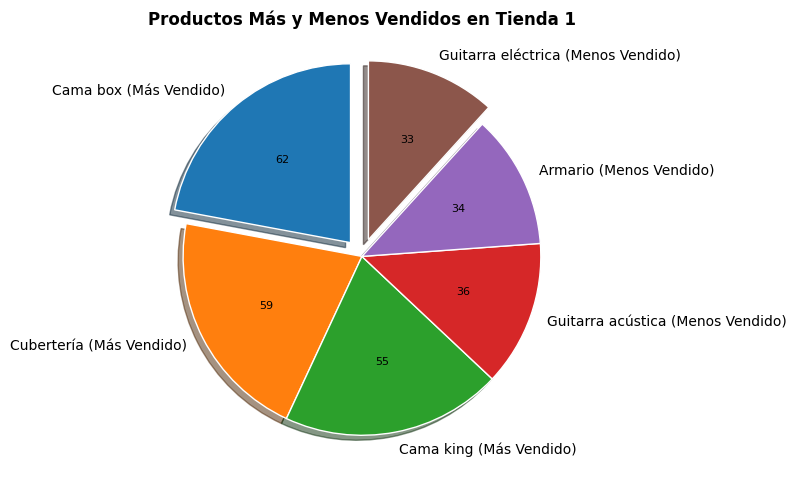

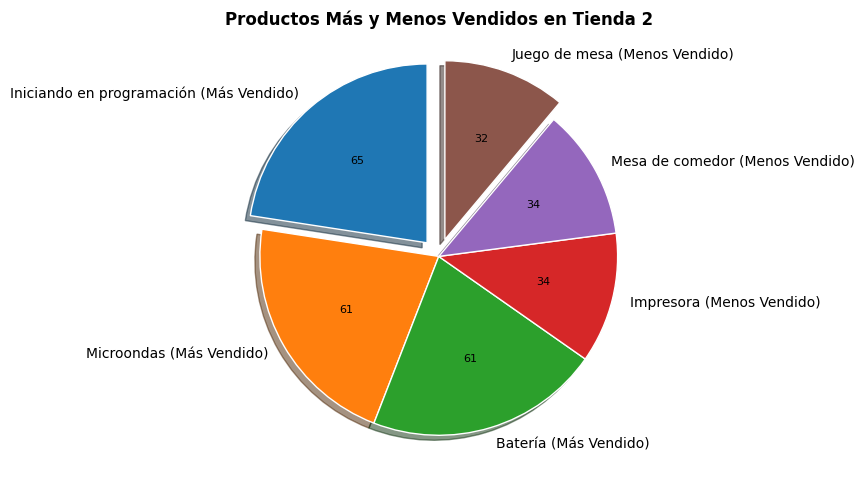

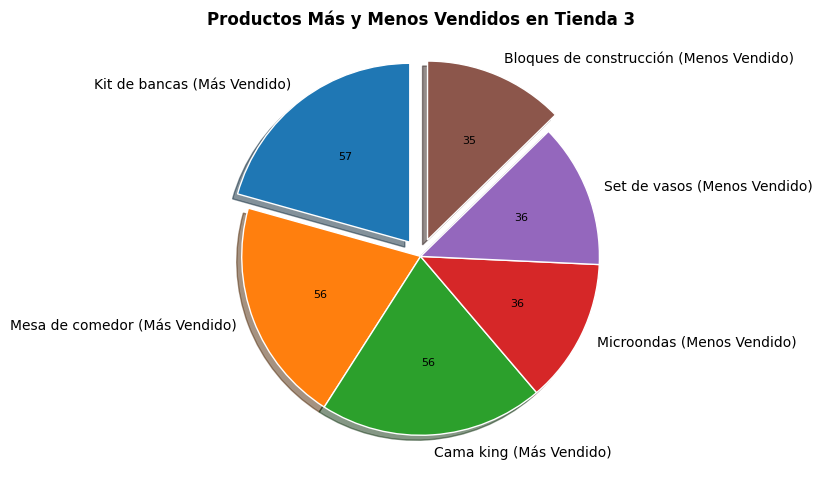

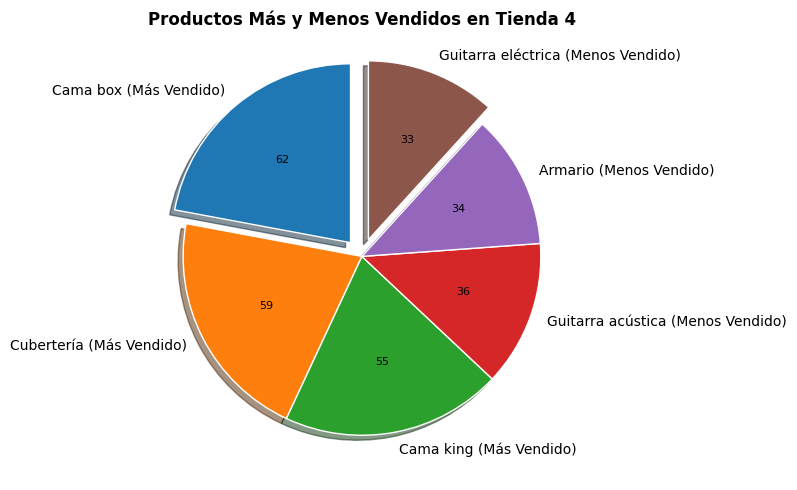

In [15]:
def crear_grafico_torta_por_tienda(nombre_tienda, datos_tienda):
    """
    Crea un gráfico de torta para visualizar los productos más y menos vendidos de una tienda.

    Args:
        nombre_tienda (str): El nombre de la tienda.
        datos_tienda (dict): Un diccionario con los productos más y menos vendidos de la tienda.
    """
    # Prepara los datos para el gráfico
    mas_vendidos = datos_tienda["mas_vendidos"]
    menos_vendidos = datos_tienda["menos_vendidos"]

    # Combina los datos para el gráfico
    productos = list(mas_vendidos.keys()) + list(menos_vendidos.keys())
    cantidades = list(mas_vendidos.values()) + list(menos_vendidos.values())
    etiquetas = [f"{p} (Más Vendido)" for p in mas_vendidos.keys()] + [f"{p} (Menos Vendido)" for p in menos_vendidos.keys()]

    # Encuentra los índices de los productos más y menos vendidos para resaltarlos
    max_index = cantidades.index(max(cantidades))
    min_index = cantidades.index(min(cantidades))
    explode = [0] * len(cantidades)  # Crea una lista de ceros
    explode[max_index] = 0.1  # Resalta el producto más vendido
    explode[min_index] = 0.1  # Resalta el producto menos vendido

    # Crea el gráfico de torta
    fig, ax = plt.subplots(figsize=(8, 5))
    def func(pct, allvals):
        absolute = int(pct/100.*sum(allvals))
        return f"{absolute:d}"

    wedges, texts, autotexts = ax.pie(cantidades,
                                      explode=explode,
                                      labels=etiquetas,
                                      autopct=lambda pct: func(pct, cantidades), # Formatea el texto a cantidad
                                      shadow=True,
                                      startangle=90,
                                      textprops={'fontsize': 10, 'color': 'black'},
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

    ax.set_title(f'Productos Más y Menos Vendidos en {nombre_tienda}', fontsize=12, fontweight='bold')
    plt.setp(autotexts, fontsize=8, color='black')
    plt.tight_layout()
    plt.show()


# Llama a la función para crear un gráfico de torta para cada tienda
for nombre_tienda, datos_tienda in resultados_por_tienda.items():
    crear_grafico_torta_por_tienda(nombre_tienda, datos_tienda)


# 5. Envío promedio por tienda

# En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [16]:
def calcular_gastos_envio_por_tienda(tiendas):
    """
    Calcula los gastos de envío totales por tienda.

    Args:
        tiendas (dict): Un diccionario donde las claves son los nombres de las tiendas
                        y los valores son los DataFrames de las tiendas.

    Returns:
        dict: Un diccionario donde las claves son los nombres de las tiendas y los
              valores son los gastos de envío totales para cada tienda.
    """
    gastos_envio_por_tienda = {}
    for nombre_tienda, tienda in tiendas.items():
        # Calcula la suma de la columna 'Costo de envío' para cada tienda
        gastos_envio_por_tienda[nombre_tienda] = tienda['Costo de envío'].sum()
    return gastos_envio_por_tienda

# Llama a la función para calcular los gastos de envío por tienda
gastos_envio = calcular_gastos_envio_por_tienda({
    "Tienda ": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
})

# Imprime los resultados
print("Gastos de envío por tienda:")
for nombre_tienda, gasto_envio in gastos_envio.items():
    print(f"{nombre_tienda}: {gasto_envio:,.0f}")

Gastos de envío por tienda:
Tienda : 55,317,400
Tienda 2: 59,485,100
Tienda 3: 58,516,600
Tienda 4: 55,317,400


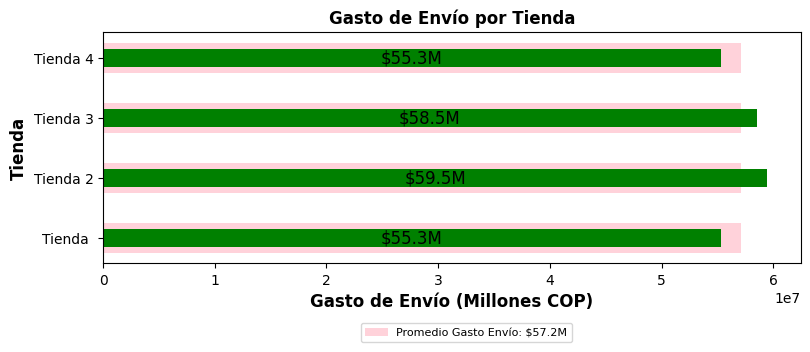

In [26]:
# Calcula el gasto de envío promedio
gasto_envio_promedio = sum(gastos_envio.values()) / len(gastos_envio)
nombre_tiendas = list(gastos_envio.keys())
sumas_gastos_envio = list(gastos_envio.values())

# Función para formatear los valores del eje x a millones
def formatoMillones(x, pos):
    """
    Formatea un número para mostrarlo en millones.
    Args:
        x (float): El número a formatear.
        pos (int): Posición (no se utiliza en este caso, requerido por FuncFormatter).
    Returns:
        str: El número formateado como una cadena (ej., '10M' para 10,000,000).
    """
    return f'{x / 1e6:.0f}M'

# Crea una nueva figura y un conjunto de subgráficos.
plt.figure(figsize=(9, 3))

# Dibuja barras horizontales para el gasto de envío promedio de las tiendas.
plt.barh(nombre_tiendas, [gasto_envio_promedio] * len(nombre_tiendas), height=0.5, color='pink', alpha=0.7, label=f'Promedio Gasto Envío: ${gasto_envio_promedio / 1e6:.1f}M')

# Dibuja barras horizontales para la suma de los gastos de envío por tienda.
barras = plt.barh(nombre_tiendas, sumas_gastos_envio, height=0.3, color='green')

# Establece el título del gráfico.
plt.title('Gasto de Envío por Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje y.
plt.ylabel('Tienda', fontsize=12, fontweight='bold')
# Establece la etiqueta del eje x.
plt.xlabel('Gasto de Envío (Millones COP)', fontsize=12, fontweight='bold')
# Formatea el eje x para mostrar los valores en millones.

# Agrega etiquetas de texto a las barras.
for bar in barras:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'${width / 1e6:.1f}M', va='center', ha='center', fontsize=12)

# Agrega una leyenda al gráfico.
plt.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.68, -0.3))
# Muestra el gráfico.
plt.show()

# **INFORME FINAL**

#INTRODUCCION

## Para ayudarle al Sr. Juan a vender una de sus 4 tiendas de Alura Store, se analizaron  los siguientes factores:

**1. Los ingresos totales de las tiendas.**

**2. Las categorías de productos más y menos vendidas.**

**3. Las calificaciones promedio de los clientes por tienda.**

**4 Los productos más y menos vendidos.**

**5 El coste de envío promedio para cada tienda.**


* Acorde a los resultados de ingresos totales de las 4 tiendas, la tienda 1 presentó un resultado favorable de $1.150.880.400.  
Asi mismo, la tienda 4 tuvo un resultado **NO favorable** con ventas de $1.038.375.700, siendo esta la que menos facturación presenta.

* Asi mismo pudimos evidenciar que los productos mas vendidos en las 4 tiendas fueron los productos **electronicos** presentando una media aproximadamente del 40%. Asi mismo, los productos menos vendido fueron los **LIBROS** con un porcentaje de participación aproximado del 20%.

* Respecto a la calificación de los clientes en las 4 clientes se tuvieron los siguientes resultados.

 * La tienda 1 y 4 tuvo una calificación promedio de 3.99 puntos.
 * la tienda 2 y 3 tuvo una calificación promedio de 4.04 puntos.

* Finalmente la tienda que presenta un mayor costo de envío es la tienda 2, con un valor de 59.2 millones.

Conclusión
* Revisando la facturación de cada una de las tiendas, su calificación y costo de envio de productos, vemos que la tienda 4 presenta una baja facturación en relación a las demas tiendas, adicionalmente el costo de envio presenta una media de 57 millones, asi mismo, los productos mas vendidos en las 4 tiendas son los productos electronicos, por ende, no se consideraría un factor diferenciador, finalmente, la calificación promedio de la tienda 1 y 4 tuvo una puntuación promedio de 3.99 puntos, sobre las demas tiendas. Por ende, se recomienda al Sr. Juan vender la **tienda 4**.

